In [1]:
from keras.datasets import mnist
from matplotlib import pyplot as plt

import numpy as np
import os
import cv2
import random
import pickle

# libraries for building the Neural Netwerk
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt


Using TensorFlow backend.
C:\Users\Kristof\AnacondaNivagtor\envs\Smart_Systems\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Kristof\AnacondaNivagtor\envs\Smart_Systems\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Kristof\AnacondaNivagtor\envs\Smart_Systems\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preparing the data

In [3]:
file_list = []
class_list = []

DATADIR = ".\Data"

# All the categories you want your neural network to detect
CATEGORIES = ["02300 BLUE", "3011 LIGHTBLUE", "3011 RED", "3011 YELLOW",
              "3198 LIGHTGREEN", "3437 BROWN", "3437 GREEN", "3437 LIGHTBLUE",
              "3437 RED", "3437 WHITE", "3437 YELLOW", "6474 YELLOW", "11198 LIGHTGREEN"]

# The size of the images that your neural network will use
IMG_SIZE = 50

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    
    for image in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE)


In [4]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        
        for image in os.listdir(path):
            try:
                image_array = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(image_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_training_data()
random.shuffle(training_data)


In [5]:
x = [] #features
y = [] # labels

for features, label in training_data:
    x.append(features)
    y.append(label)
    
x = np.array(x).reshape(-1, IMG_SIZE, IMG_SIZE, 1)


In [6]:
# Creating the files containing all the information about your model
pickle_out = open("x.pickle", "wb")
pickle.dump(x, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("x.pickle", "rb")

# Building the conolutional Neural Network

In [7]:
# Opening the files about data
x = pickle.load(open("x.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

# normalizing data (a pixel goes from 0 to 255)
x = x / 255.0

In [8]:
# Building the model
model = Sequential()

#3 Convolutional Layers
model.add(Conv2D(32, (3, 3), input_shape = x.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
# 2 hidden layers
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))

model.add(Dense(128))
model.add(Activation("relu"))

# The output layer with 13 neurons, for 13 classes
model.add(Dense(13))
model.add(Activation("softmax"))

In [10]:
# Compiling the model using some basic parameters
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam", 
              metrics=["accuracy"])

In [11]:
# Training the model, with 40 iterations
# validation_split corresponds to the percentage of images used for the validation phase compared to all the images
history = model.fit(x, y, batch_size=32, epochs=40, validation_split=0.1)

Train on 15 samples, validate on 2 samples
Epoch 1/40
15/15 [==============================] - 1s 97ms/sample - loss: 2.5609 - acc: 0.1333 - val_loss: 2.5242 - val_acc: 0.0000e+00
Epoch 2/40
15/15 [==============================] - 0s 14ms/sample - loss: 2.4424 - acc: 0.3333 - val_loss: 2.4894 - val_acc: 0.0000e+00
Epoch 3/40
15/15 [==============================] - 0s 14ms/sample - loss: 2.2972 - acc: 0.3333 - val_loss: 2.4486 - val_acc: 0.0000e+00
Epoch 4/40
15/15 [==============================] - 0s 14ms/sample - loss: 2.1005 - acc: 0.3333 - val_loss: 2.4284 - val_acc: 0.0000e+00
Epoch 5/40
15/15 [==============================] - 0s 14ms/sample - loss: 1.8903 - acc: 0.3333 - val_loss: 2.5283 - val_acc: 0.0000e+00
Epoch 6/40
15/15 [==============================] - 0s 13ms/sample - loss: 1.7693 - acc: 0.3333 - val_loss: 2.7423 - val_acc: 0.0000e+00
Epoch 7/40
15/15 [==============================] - 0s 14ms/sample - loss: 1.6607 - acc: 0.4000 - val_loss: 2.9066 - val_acc: 0.0000e+0

In [12]:
# Saving the model
model_json = model.to_json()
with open("model.json", "w") as json_file :
	json_file.write(model_json)

model.save_weights("model.h5")
print("Saved model to disk")

model.save('CNN.model')

Saved model to disk


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


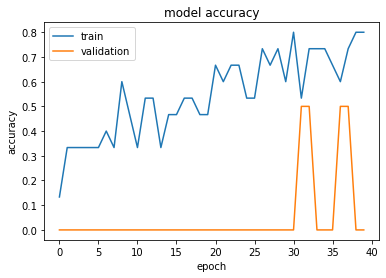

In [13]:
# Printing a graph showing the accuracy changes during the training phase
print(history.history.keys())
plt.figure(1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')


# Predicting an Image Class

In [14]:
def prepare(file):
    IMG_SIZE = 50
    image_array = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(image_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

model = tf.keras.models.load_model("CNN.model")
image = ".\Data\02300 BLUE\02300_BLUE_1.jpg" #your image path
prediction = model.predict([image])
prediction = list(prediction[0])
print(CATEGORIES[prediction.index(max(prediction))])

AttributeError: 'str' object has no attribute 'shape'